# Santander Value Prediction Challenge
==================================================================================================

![logo santander](../utils/Santander-Logo.png)


In [12]:
# Tratamiento de datos
# ================================================================================================================
import os
import numpy as np
import pandas as pd

# Gráficos
# ================================================================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Modeling and processing
# ================================================================================================================
from sklearn.model_selection import train_test_split

# Warnings configuration
# ================================================================================================================
import warnings
warnings.filterwarnings('ignore')

# Data exploration

==================================================================================================

In [3]:
# We set our current directories

NOTEBOOK_DIRECTORY_PATH = os.getcwd()
ROOT_PATH = os.path.dirname(NOTEBOOK_DIRECTORY_PATH)

In [4]:
# We load the dataset

df = pd.DataFrame(pd.read_csv(ROOT_PATH + '/data/raw/train.csv'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [6]:
df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


__Observation__:

We almost have 5000 columns, which are anonimous. Therefore, a correlation study needs powerful computacional resources that won't be deployed in the current analysis.

In [7]:
df.isnull().sum().sum()

0

__Observation__:
The data is already formatted, so we don't have any null value.

In [9]:
# We are going to remove duplicated columns, in case they do are present
df = df.loc[:,~df.columns.duplicated()]

# Furthermore, if there is any variable that is constant, we remove it
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [10]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,2891
1,float64,1845
2,object,1


# Definition of variables

==================================================================================================

In [11]:
# We define 'X' and 'y'

X = df.drop(columns=['ID', 'target'])
y = df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [14]:
# Size

print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Train features shape: (2987, 4735)
Train target shape: (2987,)
Test features shape: (1472, 4735)
Test target shape: (1472,)


In [15]:
# Distribution of the target in train

print(y_train.nunique())
print(y_train.max())
print(y_train.min())

1035
40000000.0
30000.0


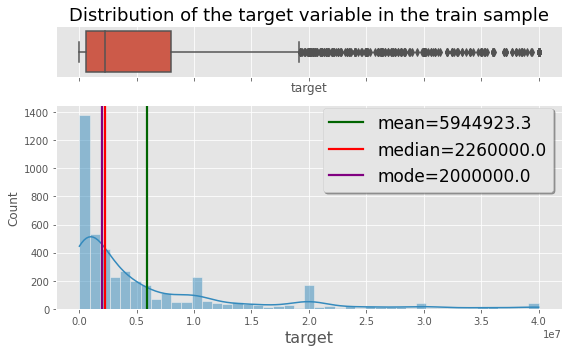

In [16]:
# Distribution of the target in train

def num_plot(df, col, title, symb):
    '''
    Con esta fórmula mostraremos la distribución de las diferentes variables
    '''
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, kde=True, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

num_plot(df, 'target', 'Distribution of the target variable in the train sample', '')

__Observation__:
We get a mainly right-skewed distribution, which indicates that most transactions are close to 0 with several outliers that must be taken into account for prediction.

In [17]:
# Save data

np.savez(ROOT_PATH + '/data/data.npz',
        X_train = X_train,
        y_train = y_train,
        X_test = X_test,
        y_test = y_test)

# Conclusion:

==================================================================================================

The DataFrame that Santander Group made accesible contains 4459 entries, each entry composed of 4993 anonimous features. In order to remove noise, we remove duplicate and constant columns. As possible next steps, it would be interesting to remove from the analysis those columns with lower correlation to the target variable. For that end, high computacional resources are a need.